In [ ]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os

In [ ]:
path=r'C:\Users\N Sai Dhanush\OneDrive - McKinsey & Company\Desktop\IMS Bearing Data\2nd_test\2nd_test'

In [ ]:
filename = '2004.02.12.10.32.39'
dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

In [ ]:
dataset

,0,1,2,3
0,-0.049,-0.071,-0.132,-0.010
1,-0.042,-0.073,-0.007,-0.105
2,0.015,0.000,0.007,0.000
3,-0.051,0.020,-0.002,0.100
4,-0.107,0.010,0.127,0.054
...,...,...,...,...
20475,0.049,-0.051,-0.039,-0.044
20476,0.037,0.061,0.115,0.007
20477,-0.012,0.007,0.056,-0.007
20478,-0.012,0.093,0.017,-0.044


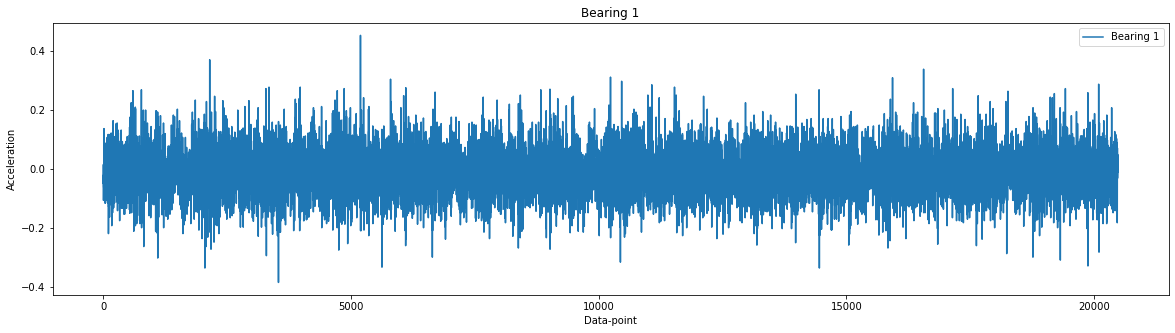

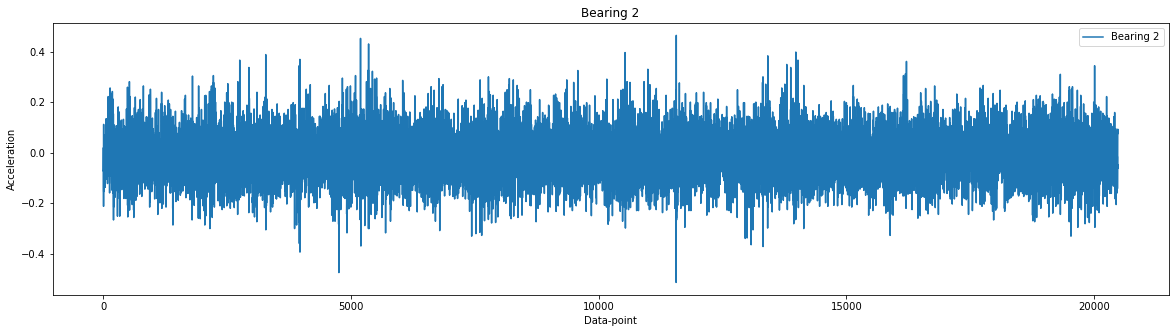

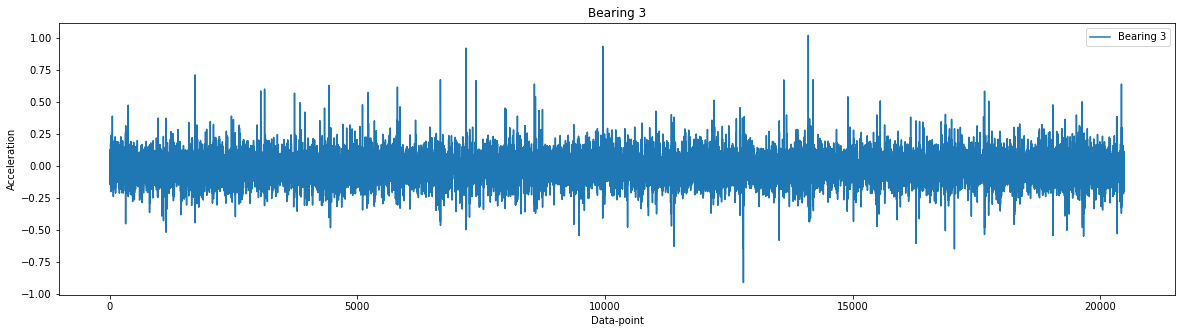

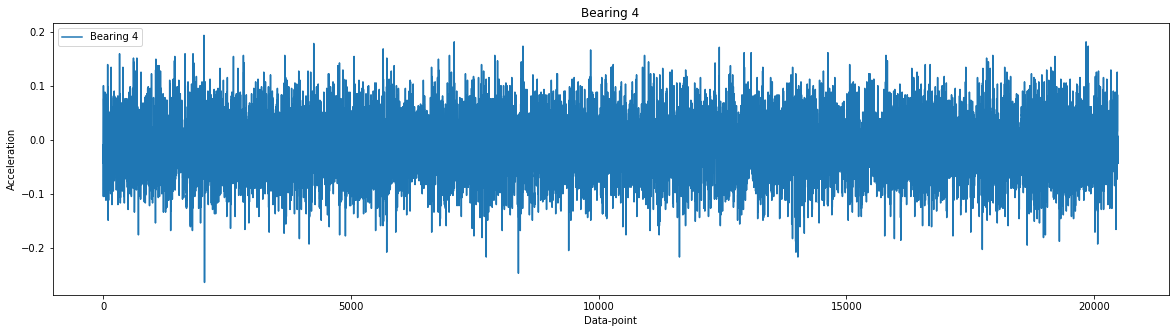

In [ ]:
for i in range(4):
    
    df_bearing=np.array(dataset.iloc[:,i])
    
    plt.figure(figsize=(20, 5))
    plt.plot(df_bearing)

    plt.legend(['Bearing {}'.format(i+1)])

    plt.xlabel("Data-point")
    plt.ylabel("Acceleration")
    plt.title('Bearing {}'.format(i+1))
    plt.show()

In [ ]:
bearing_no=1
bearing_data = np.array(dataset.iloc[:,bearing_no-1])
bearing_data

array([-0.049, -0.042,  0.015, ..., -0.012, -0.012,  0.02 ])

In [ ]:
temp = bearing_data
temp

array([-0.049, -0.042,  0.015, ..., -0.012, -0.012,  0.02 ])

### Extracting Features from Bearing Data

In [ ]:
feature_matrix=np.zeros((1,9))
feature_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### We will calculate following time domain features.

### Maximum value

### Minimum value

### Mean value

### Standard deviation (Unbiased std)

### Root mean square value (RMS)

### Skewness

### Kurtosis

### Crest factor = Max.Value / RMS
 
### Form factor = RMS / Mean


In [ ]:
def compute_skewness(x):
    
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [ ]:
def compute_kurtosis(x):
    
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [ ]:
feature_matrix[0,0] = np.max(temp)
feature_matrix[0,1] = np.min(temp)
feature_matrix[0,2] = np.mean(temp)
feature_matrix[0,3] = np.std(temp, ddof = 1)
feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
feature_matrix[0,5] = compute_skewness(temp)
feature_matrix[0,6] = compute_kurtosis(temp)
feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]

In [ ]:
feature_matrix


array([[ 0.454     , -0.386     , -0.010196  ,  0.07347672,  0.074179  ,
         0.08398728,  0.62840828,  6.12033067, -7.27530669]])

In [ ]:
df = pd.DataFrame(feature_matrix)
df.index=[filename[:-3]]
df

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307


## Creating DataFrame for Entire Test

In [ ]:
Time_feature_matrix=pd.DataFrame()

test_set=3

bearing_no=4 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'C:\Users\N Sai Dhanush\OneDrive - McKinsey & Company\Desktop\IMS Bearing Data\3rd_test\4th_test\txt'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = Time_feature_matrix.append(df)

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_16300\3366066857.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc0 in position 12: invalid start byte

In [ ]:
Time_feature_matrix

,0,1,2,3,4,5,6,7,8
2004.03.04.09.27,0.254,-0.303,-0.004331,0.055325,0.055493,0.038845,0.559706,4.577189,-12.813293
2004.03.04.09.32,0.212,-0.249,-0.006725,0.052926,0.053351,0.013904,0.355708,3.973709,-7.932665
2004.03.04.09.42,0.278,-0.278,-0.003200,0.052607,0.052703,0.034235,0.477955,5.274828,-16.469227
2004.03.04.09.52,0.269,-0.300,-0.004379,0.054671,0.054844,0.007403,0.341732,4.904798,-12.524926
2004.03.04.10.02,0.227,-0.247,-0.003443,0.053805,0.053914,0.023473,0.261460,4.210398,-15.660536
...,...,...,...,...,...,...,...,...,...
2004.04.18.02.02,0.867,-0.955,-0.003682,0.248059,0.248081,-0.026558,0.022271,3.494830,-67.379632
2004.04.18.02.12,0.918,-0.813,-0.003608,0.253635,0.253654,0.104431,-0.257887,3.619096,-70.304147
2004.04.18.02.22,1.082,-1.104,-0.003425,0.279849,0.279863,0.002889,0.030199,3.866172,-81.701455
2004.04.18.02.32,0.881,-0.969,-0.003452,0.282160,0.282174,-0.108601,-0.486148,3.122183,-81.743400


In [ ]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_4_Test_3.csv'.format(bearing_no,test_set))

Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.254,-0.303,-0.004331,0.055325,0.055493,0.038845,0.559706,4.577189,-12.813293
2004-03-04 09:32:00,0.212,-0.249,-0.006725,0.052926,0.053351,0.013904,0.355708,3.973709,-7.932665
2004-03-04 09:42:00,0.278,-0.278,-0.003200,0.052607,0.052703,0.034235,0.477955,5.274828,-16.469227
2004-03-04 09:52:00,0.269,-0.300,-0.004379,0.054671,0.054844,0.007403,0.341732,4.904798,-12.524926
2004-03-04 10:02:00,0.227,-0.247,-0.003443,0.053805,0.053914,0.023473,0.261460,4.210398,-15.660536
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,0.867,-0.955,-0.003682,0.248059,0.248081,-0.026558,0.022271,3.494830,-67.379632
2004-04-18 02:12:00,0.918,-0.813,-0.003608,0.253635,0.253654,0.104431,-0.257887,3.619096,-70.304147
2004-04-18 02:22:00,1.082,-1.104,-0.003425,0.279849,0.279863,0.002889,0.030199,3.866172,-81.701455
2004-04-18 02:32:00,0.881,-0.969,-0.003452,0.282160,0.282174,-0.108601,-0.486148,3.122183,-81.743400


## EDA

In [ ]:
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_2.csv")
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_2.csv",index_col='Unnamed: 0')
df1.index = pd.to_datetime(df1.index)
df1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578


In [ ]:
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_2.csv",index_col='Unnamed: 0')
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_2.csv",index_col='Unnamed: 0')
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_2.csv",index_col='Unnamed: 0')
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_2.csv",index_col='Unnamed: 0')

In [ ]:
df1.index = pd.to_datetime(df1.index)
df1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578


In [ ]:
df1.columns

Index(['Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness', 'Kurtosis',
       'Crest Factor', 'Form Factor'],
      dtype='object')

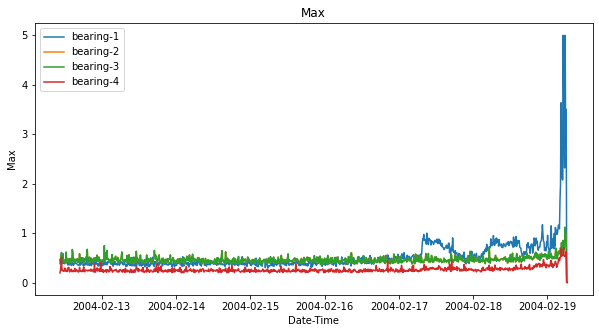

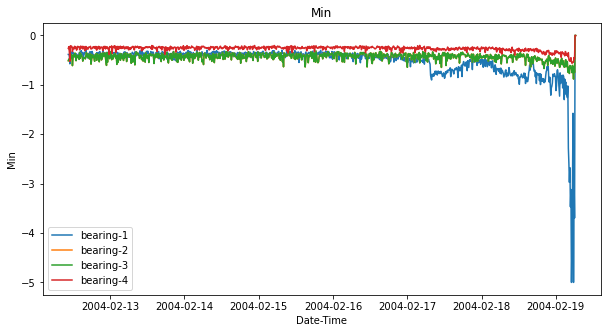

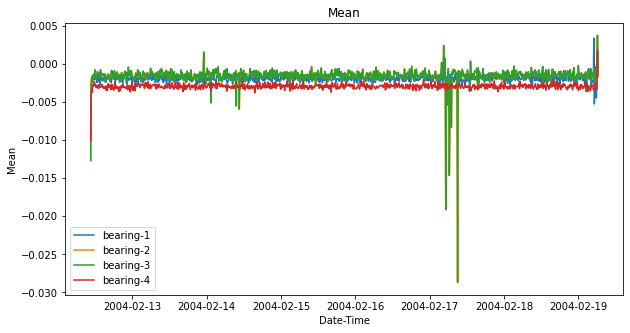

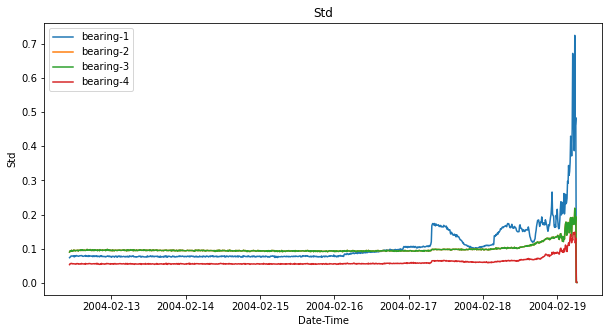

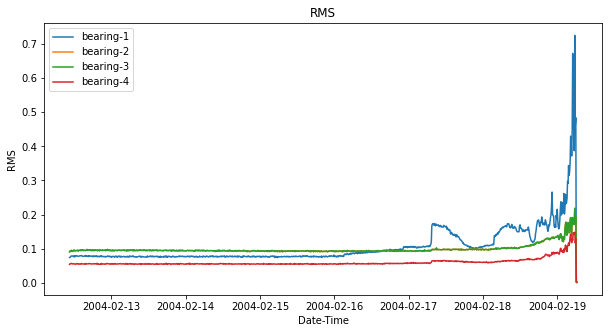

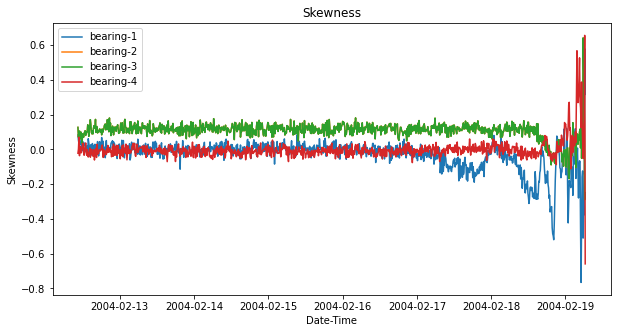

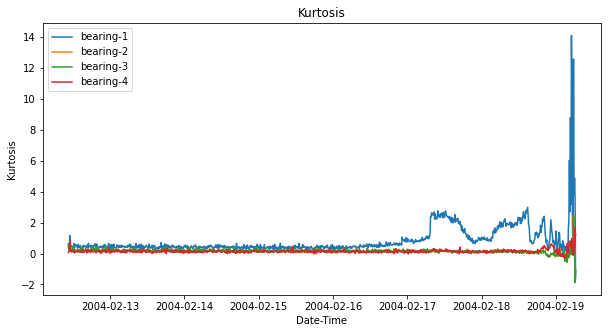

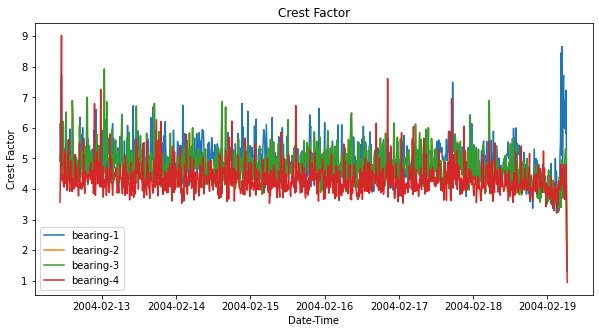

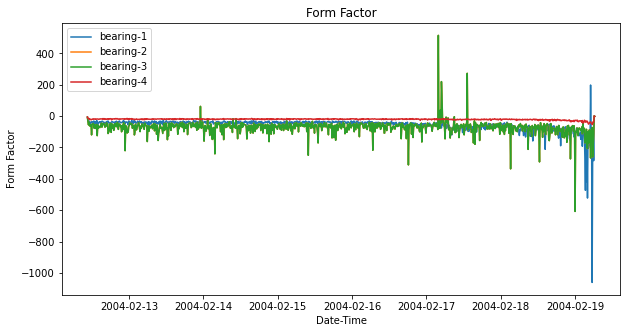

In [ ]:
for col in (df1.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()